# Role Detection


Visualize the graph role for diverse time.

[weekdays]<br>
1. commuted time<br>
    6-10<br>
    16-21<br>
2. regular time(except commuted time)<br>
    10-16<br>
    
[weekends]<br>

3. time on weekends<br>
    6-10<br>
    10-16<br>
    16-21



In [1]:
import numpy as np
import pandas as pd
import pickle
import networkx as nx
import datetime as dt

from graphrole import RecursiveFeatureExtractor, RoleExtractor
from pprint import pprint
import seaborn as sns
import warnings

import folium
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [2]:
warnings.filterwarnings(action='ignore')

## Location EDA

- sensor location visualization
- role detection based on location

In [3]:
%pwd

'C:\\Users\\User\\OneDrive - postech.ac.kr\\1-1\\ML for graph\\project\\Traffic-Prediction\\code'

In [44]:
location = pd.read_csv('../../data/graph_sensor_locations_la.csv',header = None)
location.columns = location.iloc[0]
location.drop(location.index[0], inplace = True)
location.drop(['index'], axis=1, inplace=True)
location.reset_index(inplace=True, drop=True)
location

,sensor_id,latitude,longitude
0,773869,34.15497,-118.31829
1,767541,34.11621,-118.23799
2,767542,34.11641,-118.23819
3,717447,34.07248,-118.26772
4,717446,34.07142,-118.26572
...,...,...,...
202,717592,34.14604,-118.22430
203,717595,34.14163,-118.18290
204,772168,34.16542,-118.47985
205,718141,34.15133,-118.37456


In [45]:
map_osm = folium.Map(location=[34.1882,-118.325], zoom_start=11)

for i in location.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = location.loc[i, 'sensor_id']
    lat = location.loc[i, 'latitude']
    lng = location.loc[i, 'longitude']
    
    # 추출한 정보를 지도에 표시
    marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color='blue'))
    marker.add_to(map_osm)

map_osm

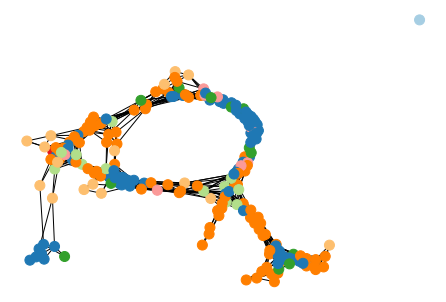

In [46]:
### Read adj_matrix (DCRNN>data)
with open('../../data/adj_mx_la_distance.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    adj_la = u.load()
adj_la = np.array(adj_la)[-1]

G = nx.Graph(adj_la)

feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

node_roles = role_extractor.roles

# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in G.nodes]


# plot graph
plt.figure()
with warnings.catch_warnings():
    # catch matplotlib deprecation warning
#     warnings.simplefilter('ignore')
    warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
    
    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        # with_labels=True,
        node_color=node_colors,
        node_size= 100, #default=300
        font_size = 5 #default=12
    )
plt.show()

In [47]:
len(unique_roles)

8

In [48]:
node_roles 

{0: 'role_1',
 1: 'role_7',
 2: 'role_7',
 3: 'role_1',
 4: 'role_1',
 5: 'role_1',
 6: 'role_4',
 7: 'role_1',
 8: 'role_7',
 9: 'role_3',
 10: 'role_2',
 11: 'role_7',
 12: 'role_1',
 13: 'role_1',
 14: 'role_7',
 15: 'role_1',
 16: 'role_1',
 17: 'role_3',
 18: 'role_1',
 19: 'role_1',
 20: 'role_7',
 21: 'role_1',
 22: 'role_1',
 23: 'role_6',
 24: 'role_1',
 25: 'role_7',
 26: 'role_0',
 27: 'role_7',
 28: 'role_1',
 29: 'role_3',
 30: 'role_7',
 31: 'role_7',
 32: 'role_3',
 33: 'role_1',
 34: 'role_7',
 35: 'role_1',
 36: 'role_7',
 37: 'role_1',
 38: 'role_7',
 39: 'role_4',
 40: 'role_2',
 41: 'role_7',
 42: 'role_1',
 43: 'role_1',
 44: 'role_5',
 45: 'role_6',
 46: 'role_6',
 47: 'role_7',
 48: 'role_7',
 49: 'role_2',
 50: 'role_1',
 51: 'role_6',
 52: 'role_7',
 53: 'role_7',
 54: 'role_1',
 55: 'role_1',
 56: 'role_7',
 57: 'role_7',
 58: 'role_1',
 59: 'role_7',
 60: 'role_7',
 61: 'role_6',
 62: 'role_3',
 63: 'role_7',
 64: 'role_7',
 65: 'role_6',
 66: 'role_6',
 67: 

In [49]:
# same format as the variable 'partition' in Louvian-community.ipynb
node_roles.update((k, int(v.split("_")[1])) for k, v in node_roles.items())
node_roles

{0: 1,
 1: 7,
 2: 7,
 3: 1,
 4: 1,
 5: 1,
 6: 4,
 7: 1,
 8: 7,
 9: 3,
 10: 2,
 11: 7,
 12: 1,
 13: 1,
 14: 7,
 15: 1,
 16: 1,
 17: 3,
 18: 1,
 19: 1,
 20: 7,
 21: 1,
 22: 1,
 23: 6,
 24: 1,
 25: 7,
 26: 0,
 27: 7,
 28: 1,
 29: 3,
 30: 7,
 31: 7,
 32: 3,
 33: 1,
 34: 7,
 35: 1,
 36: 7,
 37: 1,
 38: 7,
 39: 4,
 40: 2,
 41: 7,
 42: 1,
 43: 1,
 44: 5,
 45: 6,
 46: 6,
 47: 7,
 48: 7,
 49: 2,
 50: 1,
 51: 6,
 52: 7,
 53: 7,
 54: 1,
 55: 1,
 56: 7,
 57: 7,
 58: 1,
 59: 7,
 60: 7,
 61: 6,
 62: 3,
 63: 7,
 64: 7,
 65: 6,
 66: 6,
 67: 6,
 68: 1,
 69: 7,
 70: 7,
 71: 7,
 72: 1,
 73: 7,
 74: 7,
 75: 7,
 76: 7,
 77: 1,
 78: 7,
 79: 7,
 80: 1,
 81: 1,
 82: 1,
 83: 7,
 84: 1,
 85: 1,
 86: 7,
 87: 7,
 88: 1,
 89: 7,
 90: 7,
 91: 4,
 92: 2,
 93: 1,
 94: 3,
 95: 7,
 96: 1,
 97: 1,
 98: 4,
 99: 7,
 100: 7,
 101: 7,
 102: 2,
 103: 1,
 104: 7,
 105: 7,
 106: 7,
 107: 7,
 108: 7,
 109: 2,
 110: 2,
 111: 1,
 112: 6,
 113: 2,
 114: 1,
 115: 7,
 116: 4,
 117: 2,
 118: 7,
 119: 7,
 120: 6,
 121: 1,
 122: 7,
 12

In [50]:
colors = ['orange', 'blue', 'lightblue', 'lightred', 'beige', 'darkred', 'lightgreen', 'darkblue', 'black', 'darkgreen', 'pink', 'cadetblue', 'white', 'green', 'gray', 'darkpurple', 'purple', 'lightgray', 'red']
len(colors)

19

In [51]:
location.index

RangeIndex(start=0, stop=207, step=1)

In [53]:
map_osm = folium.Map(location=[34.1882,-118.325], zoom_start=11)

for i in location.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = location.loc[i, 'sensor_id']
    lat = location.loc[i, 'latitude']
    lng = location.loc[i, 'longitude']
    c = node_roles[i]

    marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color=colors[c]))
    marker.add_to(map_osm)

map_osm

In [54]:
map_osm.save('../../data/la_role_all.html')

## Comumunity detection by Speed

In [55]:
speed_la = pd.read_csv("../../data/la_speed.csv")
speed_la

,Unnamed: 0,773869,767541,767542,717447,717446,717445,773062,767620,737529,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
0,2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
1,2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
2,2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
3,2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34267,2012-06-27 23:35:00,65.000000,65.888889,68.555556,61.666667,0.000000,54.555556,62.444444,63.333333,59.222222,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
34268,2012-06-27 23:40:00,61.375000,65.625000,66.500000,62.750000,0.000000,50.500000,62.000000,67.000000,65.250000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
34269,2012-06-27 23:45:00,67.000000,59.666667,69.555556,61.000000,0.000000,44.777778,64.222222,63.777778,59.777778,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
34270,2012-06-27 23:50:00,66.750000,62.250000,66.000000,59.625000,0.000000,53.000000,64.285714,64.125000,60.875000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


### add day_name

In [56]:
speed_la['Unnamed: 0'] = pd.to_datetime(speed_la['Unnamed: 0'])
speed_la['w_name'] = speed_la['Unnamed: 0'].dt.day_name()
speed_la.head()

,Unnamed: 0,773869,767541,767542,717447,717446,717445,773062,767620,737529,...,769372,774204,769806,717590,717592,717595,772168,718141,769373,w_name
0,2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,...,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875,Thursday
1,2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,...,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875,Thursday
2,2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,...,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000,Thursday
3,2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,Thursday
4,2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,Thursday


In [57]:
speed_la['w_name']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
           ...    
34267    Wednesday
34268    Wednesday
34269    Wednesday
34270    Wednesday
34271    Wednesday
Name: w_name, Length: 34272, dtype: object

### seperate data by time

6-10,10-16,16-21

In [58]:
date_time = list(speed_la['Unnamed: 0'])

In [59]:
six_to_10 = []
ten_to_16 =[]
sixteens_to_21 = []

for i in range(len(date_time)):
    if date_time[i].hour in range(6,10):
        six_to_10.append(speed_la.iloc[i])
        
    elif speed_la['Unnamed: 0'][i].hour in range(10,16):
        ten_to_16.append(speed_la.iloc[i])
        
    elif speed_la['Unnamed: 0'][i].hour in range(16,21):
        sixteens_to_21.append(speed_la.iloc[i])
        
        
six_to_10 = pd.DataFrame(six_to_10)
ten_to_16 = pd.DataFrame(ten_to_16)
sixteens_to_21 = pd.DataFrame(sixteens_to_21)

### weekdays and weekends

In [60]:
six_to_10_S = six_to_10[(six_to_10['w_name'] == 'Sunday')| (six_to_10['w_name'] == 'Saturday')] #S: weekends
six_to_10_W = six_to_10[(six_to_10['w_name']!= 'Sunday') & (six_to_10['w_name'] != 'Saturday')] #W: weekdays


ten_to_16_S = ten_to_16[(ten_to_16['w_name'] == 'Sunday')| (ten_to_16['w_name'] == 'Saturday')]
ten_to_16_W = ten_to_16[(ten_to_16['w_name']!= 'Sunday') & (ten_to_16['w_name'] != 'Saturday')]

sixteens_to_21_S = sixteens_to_21[(sixteens_to_21['w_name'] == 'Sunday')| (sixteens_to_21['w_name'] == 'Saturday')]
sixteens_to_21_W = sixteens_to_21[(sixteens_to_21['w_name']!= 'Sunday') & (sixteens_to_21['w_name'] != 'Saturday')]


### make adjacent matrix

- for mean of sensor's speed
- by using gaussian kernels

In [61]:
def Gaussian(x, z, sigma):
    return np.exp((-(np.linalg.norm(x-z)**2))/(2*sigma**2))

def GaussianMatrix(X, sigma):
    row, col = X.shape
    GassMatrix = np.zeros(shape=(row, row))
    X = np.asarray(X)
    i=0
    for v_i in X:
        j=0
        for v_j in X:
            GassMatrix[i, j] = Gaussian(v_i.T, v_j.T, sigma)
            j+=1
        i+=1
    return GassMatrix

def adj_mat_speed(data):
    # mean speed per sensors for each time slot (shape: (# of sensor)x1)
    mean = pd.DataFrame(data.mean(axis = 0)) 
    # calculate similarity between all sensors (shape: (# of sensor)x(# of sensor))
    adj_mat = GaussianMatrix(mean, sigma = 1)
    
    return adj_mat

In [62]:
def visualization_role(data, location):
    
    G = nx.Graph(adj_mat_speed(data))
    
    # role analysis
    feature_extractor = RecursiveFeatureExtractor(G)
    features = feature_extractor.extract_features()

    role_extractor = RoleExtractor(n_roles=None)
    role_extractor.extract_role_factors(features)

    node_roles = role_extractor.roles
    node_roles.update((k, int(v.split("_")[1])) for k, v in node_roles.items())
    
    partition = node_roles
    
    stat = pd.DataFrame(data.mean(axis = 0), columns = ['AvgSpeed'])
    stat['role'] = partition.values()
    report = stat.groupby(stat['role']).describe()
    report.index = colors[:len(report)]
    print(report)
    
    map_osm = folium.Map(location=[34.1882,-118.325], zoom_start=10)

    for i in location.index:
        # 행 우선 접근 방식으로 값 추출하기
        name = location.loc[i, 'sensor_id']
        lat = location.loc[i, 'latitude']
        lng = location.loc[i, 'longitude']
        c = partition[i]
        
        marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color=colors[c]))
        marker.add_to(map_osm)

    return map_osm

### 6-10 weekdays

In [63]:
map_osm = visualization_role(six_to_10_W,location)
map_osm.save('../../data/la_role_6to10_weekdays.html')
map_osm

          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange         4.0  16.305825  1.635588  14.636203  15.325941  16.068280   
blue         197.0  50.585073  9.508608  28.342454  42.926039  53.031887   
lightblue      6.0  23.793423  1.826106  21.931922  22.139205  23.804977   

                                 
                 75%        max  
orange     17.048165  18.450538  
blue       58.395896  63.239680  
lightblue  25.226166  25.934818  


### 6-10 weekends

In [64]:
map_osm = visualization_role(six_to_10_S,location)
map_osm.save('../../data/la_role_6to10_weekends.html')
map_osm

       AvgSpeed                                                        \
          count       mean       std        min        25%        50%   
orange     22.0  46.582321  6.520485  29.958247  43.394774  49.752357   
blue      185.0  57.419723  2.179315  52.305806  55.892908  57.629463   

                              
              75%        max  
orange  50.769694  51.869964  
blue    59.300484  61.326502  


### 6-10 all days

In [65]:
map_osm = visualization_role(six_to_10,location)
map_osm.save('../../data/la_role_6to10_all.html')
map_osm

          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange        88.0  56.797973  2.353680  52.962046  54.621465  57.214296   
blue           1.0  23.942530       NaN  23.942530  23.942530  23.942530   
lightblue    118.0  47.222744  9.086867  26.248747  41.224443  47.193527   

                                 
                 75%        max  
orange     59.085716  60.481891  
blue       23.942530  23.942530  
lightblue  52.128192  62.541025  


### 10-16 weekdays

In [66]:
map_osm = visualization_role(ten_to_16_W,location)
map_osm.save('../../data/la_role_10to16_weekdays.html')
map_osm

          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange        96.0  55.756290  2.845985  50.932121  52.895721  56.696754   
blue           2.0  21.894624  0.948811  21.223713  21.559168  21.894624   
lightblue    109.0  48.837089  9.519960  25.514418  43.439815  48.307227   

                                 
                 75%        max  
orange     57.951602  60.238846  
blue       22.230079  22.565534  
lightblue  55.171982  63.409903  


### 10-16 weekends

In [67]:
map_osm = visualization_role(ten_to_16_S,location)
map_osm.save('../../data/la_role_10to16_weekends.html')
map_osm

          AvgSpeed                                                         \
             count       mean        std        min        25%        50%   
orange        27.0  63.023824   0.628523  61.967026  62.591224  63.007998   
blue          36.0  49.588309   7.160979  23.265507  48.610604  50.408156   
lightblue     61.0  46.637790  10.010348  26.039783  39.080822  46.916328   
lightred      83.0  58.461291   1.834829  55.262236  56.817430  58.654802   

                                 
                 75%        max  
orange     63.586046  63.812183  
blue       51.733466  64.326445  
lightblue  53.832178  64.129905  
lightred   59.880928  61.797179  


### 10-16 all days

In [68]:
map_osm = visualization_role(ten_to_16,location)
map_osm.save('../../data/la_role_10to16_all.html')
map_osm

          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange        89.0  56.139868  4.395766  21.807083  54.182385  57.319522   
blue         105.0  48.237524  9.300940  23.430607  43.725691  48.711204   
lightblue     13.0  60.840554  0.300637  60.407405  60.589361  60.847657   

                                 
                 75%        max  
orange     58.492264  59.943281  
blue       51.896125  63.671772  
lightblue  60.989276  61.330354  


### 16-21 weekdays

In [69]:
map_osm = visualization_role(sixteens_to_21_W,location)
map_osm.save('../../data/la_role_16to21_weekdays.html')
map_osm

          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange       110.0  49.709994  8.275091  23.026799  42.718184  50.238730   
blue          67.0  46.403669  9.672555  29.702374  37.610230  47.606216   
lightblue     30.0  61.140660  9.781294  25.342722  62.258893  63.620509   

                                 
                 75%        max  
orange     57.894927  61.458125  
blue       53.291601  66.367093  
lightblue  64.808916  65.319681  


### 16-21 weekends

In [70]:
map_osm = visualization_role(sixteens_to_21_S,location)
map_osm.save('../../data/la_role_16to21_weekends.html')
map_osm

          AvgSpeed                                                         \
             count       mean        std        min        25%        50%   
orange       128.0  59.472627   3.907345  25.594960  57.438367  59.910525   
blue          71.0  49.403171   9.070780  26.361588  43.101295  50.719728   
lightblue      8.0  59.575624  13.565548  26.004145  64.191276  64.368689   

                                 
                 75%        max  
orange     61.837474  64.144886  
blue       54.628971  65.268198  
lightblue  64.475291  64.515153  


### 16-21 all days

In [71]:
map_osm = visualization_role(sixteens_to_21,location)
map_osm.save('../../data/la_role_16to21_all.html')
map_osm

          AvgSpeed                                                         \
             count       mean        std        min        25%        50%   
orange       194.0  51.441334   8.372568  23.979596  45.764003  52.221663   
blue          10.0  61.435710  12.310277  26.416549  65.022280  65.110906   
lightblue      2.0  64.861088   0.039267  64.833322  64.847205  64.861088   
lightred       1.0  26.341484        NaN  26.341484  26.341484  26.341484   

                                 
                 75%        max  
orange     58.572246  64.680267  
blue       65.596483  65.990928  
lightblue  64.874970  64.888853  
lightred   26.341484  26.341484  
